# Assimilation of SWOT data 

## Software version

In [1]:
import sys
print (sys.version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## Library importation

In [2]:
%matplotlib inline
import sys,os,shutil
import numpy as np
import matplotlib.pylab as plt
import time
import netCDF4 as nc
import qgsw
import modgrid
from datetime import datetime
from datetime import timedelta

## Description

### 1. Experiment setting
#### 1.1. Initialization settings 

###### Definitions

- <span style="color:blue">n_ensemble</span>: number of ensemble members, *<span style="color:gray">integer</span>*
  
###### Imports

- Initialization from initialization_functions: global initialization function calling *initialization*
- initialization from initialization_functions:
    * <span style="color:blue">NATL60state</span>: initialization of a single SSH field (n_ensemble==1) using an internally prescribed SSH field of dimensions

#### 1.2.  Time settings

###### Definitions

- <span style="color:blue">init_date</span>: experimental starting date, *<span style="color:gray">datetime object (yyyy,mm,dd,hh)</span>*
- present_date: current date starting at *init_date* and ending at *final_date* during time loop, *<span style="color:gray">datetime object (yyyy,mm,dd,hh)</span>*
- <span style="color:blue">final_date</span>: experimental ending date, *<span style="color:gray">datetime object (yyyy,mm,dd,hh)</span>*
- <span style="color:blue">assimilation_time_step</span>: assimilation cycle time step, *<span style="color:gray">timedelta object (in hours)</span>* 

#### 1.3.  Model settings 

###### Definitions
 
###### Imports
- EnsembleModel from Model: global model function propagating an ensemble of SSH fields over a time period by calling *model* *n_ensemble*-times 

- model from Model:   
    * <span style="color:blue">QG_SW</span>: quasi-geostrophic shallow-water model propagating an SSH field over a time period 
        
 

#### 1.4.  Observation settings

###### Definitions

- <span style="color:blue">obs_path</span>: observation directory path, *<span style="color:gray">string</span>*  

###### Imports

- ObservationCheck from Observation: function checking if observations are available at assimilation time 


#### 1.5.  Analysis settings

###### Parameters

- a 

###### Functions

- a

#### 1.6.  Outputs settings

###### Definitions

- <span style="color:blue"> outputs</span>: command the "plot" or "save" of SSH fields, *<span style="color:gray"> string </span>*

###### Functions

- Save_present_time_outputs from Saveoutputs: save an ensemble SSH fields at a definite time in a file

### 2. Initialization

###### Definitions
  
- SSH_fields0: ensemble of initial SSH fields produced by *Initialization* function, *<span style="color:gray">3D array of dimensions [n_ensemble,n_lon, n_lat]</span>*
- lon: longitud field produced by *Initialization* function, *<span style="color:gray">2D array of dimensions [n_lon, n_lat]</span>*
- lat: latitud field produced by *Initialization* function, *<span style="color:gray">2D array of dimensions [n_lon, n_lat]</span>*

### 3. Time loop
#### 3.1. Propagation 

###### Definitions
- SSH_fields: ensemble of *present_date* SSH fields produced by *model* function, *<span style="color:gray">3D array of dimensions [n_ensemble,n_lon,n_lat]</span>*

#### 3.2. Observation check
#### 3.3. Observation retrieval
#### 3.4. Analysis 
#### 3.5. Outputs 
### 4. Final outputs
 

## 1. Experiment settings

### 1.1. Initialization settings 

In [3]:
# Ensemble size
n_ensemble=2

# Initialization function 
from initialization_functions import Initialization
from initialization_functions import NATL60state as initialization 


### 1.2. Time settings

In [4]:
# Initial and present date
init_date=datetime(2012,9,1,0) # (yyyy,mm,dd,hh)
present_date=init_date

# Final date
final_date=datetime(2012,9,1,5) # (yyyy,mm,dd,hh)

# Assimilation time step
assimilation_time_step=timedelta(hours=1)  

### 1.3. Model settings

In [5]:
from Model import EnsembleModel
from Model import QG_SW as model

### 1.4. Observation settings

In [ ]:
from Observation import ObservationCheck
obs_path="/Users/sammymetref/Documents/Boost-Swot/Notebooks/GitHub/Personal_Files/2018/Data/OBS/"

### 1.5. Analysis settings

### 1.6. Outputs settings

In [6]:
from Saveoutputs import Save_present_time_outputs 
plotoutputs=True # plot final outputs
saveoutputs=True # save all outputs


## 2. Initialization 

In [7]:
# Calling initialization module 
[SSH_fields0,lon,lat]=Initialization(initialization,n_ensemble) 

## 3. Time loop

In [8]:
while present_date<final_date :
    
    ####################
    # 3.1. Propagation #
    ####################
    print('Propagation in progress')   
    SSH_fields=EnsembleModel(model,SSH_fields0,n_ensemble,lon, lat, assimilation_time_step.seconds)
    
    ##########################
    # 3.2. Observation check #
    ########################## 
    print('Observation check in progress')
    obs_avail=ObservationCheck(present_date,assimilation_time_step.seconds,obs_path)

    ##############################
    # 3.3. Observation retrieval #
    ##############################
    if obs_avail: 
        print('Observation retrieval in progress')

    #################
    # 3.4. Analysis #
    #################
    if False: 
        print('Analysis in progress')
        
    #################
    # 3.5. Outputs  #
    ################# 
    print('Output in progress')
    
    if saveoutputs :
        Save_present_time_outputs(SSH_fields,n_ensemble,lon, lat,present_date)
         
        
    
    present_date=present_date+assimilation_time_step


Propagation in progress
Output in progress
Propagation in progress
Output in progress
Propagation in progress
Output in progress
Propagation in progress
Output in progress
Propagation in progress
Output in progress


## 4. Final outputs

Plot in progress
(2, 301, 175)


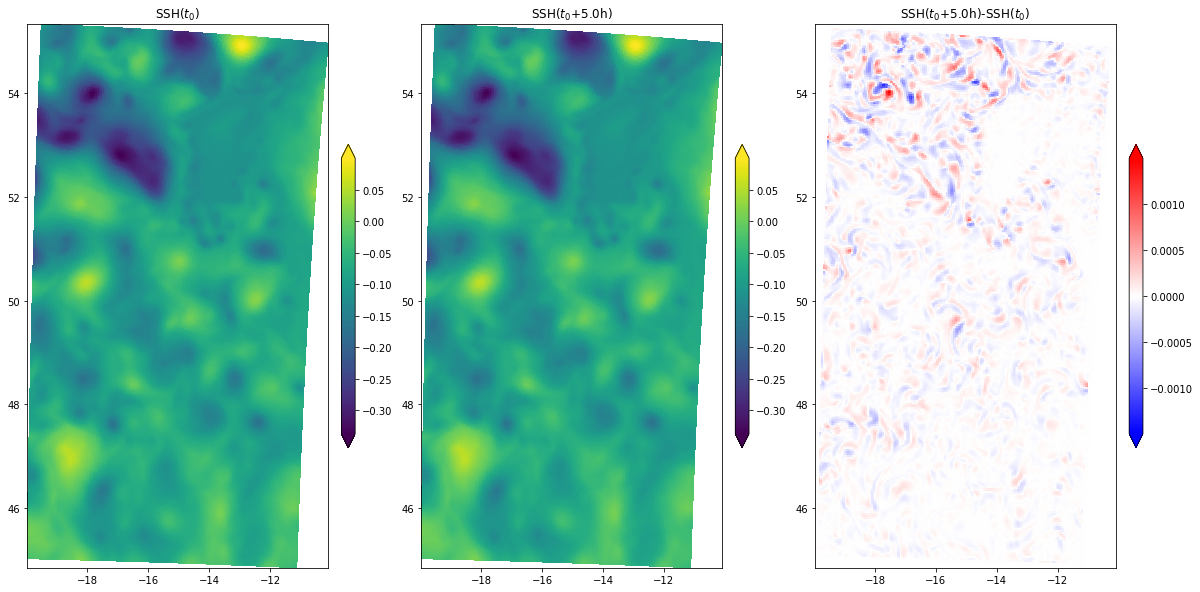

In [9]:
if plotoutputs :
    print('Plot in progress')
    
    SSHmean0=np.mean(SSH_fields0,0) 
    SSHmean=np.mean(SSH_fields,0) 
    timet=(final_date-init_date).seconds/3600 
     
    
    plt.figure(figsize=(20, 10))
     
    plt.subplot(131)
    plt.pcolormesh(lon,lat,SSHmean0)
    plt.colorbar(extend='both', fraction=0.042, pad=0.04)
    plt.title('SSH($t_0$)');

    plt.subplot(132)
    plt.pcolormesh(lon,lat,SSHmean)
    plt.colorbar(extend='both', fraction=0.042, pad=0.04) 
    plt.title('SSH($t_0$+%sh)' %timet);
    
    max_range_degrad=np.max(np.max(np.abs(SSHmean-SSHmean0)))
    plt.subplot(133)
    plt.pcolormesh(lon,lat,SSHmean-SSHmean0,cmap=plt.cm.get_cmap('bwr'))
    plt.colorbar(extend='both', fraction=0.042, pad=0.04)
    plt.clim(-max_range_degrad,max_range_degrad)
    plt.title('SSH($t_0$+%sh)-SSH($t_0$)'%timet);
    
    print(np.shape(SSH_fields))
     